In [14]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [16]:

alcohol_sales_df = pd.read_csv('Alcohol_Sales.csv')
miles_traveled_df = pd.read_csv('Miles_Traveled.csv')

# Preview the datasets
print(alcohol_sales_df.head())
print(miles_traveled_df.head())


         DATE  S4248SM144NCEN
0  1992-01-01            3459
1  1992-02-01            3458
2  1992-03-01            4002
3  1992-04-01            4564
4  1992-05-01            4221
         DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0


In [17]:
# Rename columns for Alcohol Sales dataset
alcohol_sales_df.rename(columns={'DATE': 'ds', 'S4248SM144NCEN': 'y'}, inplace=True)
alcohol_sales_df['ds'] = pd.to_datetime(alcohol_sales_df['ds'])

# Rename columns for Miles Traveled dataset
miles_traveled_df.rename(columns={'DATE': 'ds', 'TRFVOLUSM227NFWA': 'y'}, inplace=True)
miles_traveled_df['ds'] = pd.to_datetime(miles_traveled_df['ds'])

# Preview the formatted data
print(alcohol_sales_df.head())
print(miles_traveled_df.head())


          ds     y
0 1992-01-01  3459
1 1992-02-01  3458
2 1992-03-01  4002
3 1992-04-01  4564
4 1992-05-01  4221
          ds        y
0 1970-01-01  80173.0
1 1970-02-01  77442.0
2 1970-03-01  90223.0
3 1970-04-01  89956.0
4 1970-05-01  97972.0


In [18]:
from prophet import Prophet

# Function to train and predict using Prophet
def train_and_predict(data):
    # Initialize and fit the model
    model = Prophet()
    model.fit(data)
    
    # Make future dataframe and predict
    future = model.make_future_dataframe(periods=12, freq='M')  # Adjust periods as needed
    forecast = model.predict(future)
    
    return forecast

# Train and predict for Alcohol Sales
alcohol_forecast = train_and_predict(alcohol_sales_df)
print(alcohol_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Train and predict for Miles Traveled
miles_forecast = train_and_predict(miles_traveled_df)
print(miles_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())



13:24:32 - cmdstanpy - INFO - Chain [1] start processing
13:24:32 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yeric\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


            ds          yhat    yhat_lower    yhat_upper
332 2019-08-31  13295.571598  12680.113760  13898.701461
333 2019-09-30  13722.942566  13140.625419  14324.667117
334 2019-10-31  13476.971267  12879.547636  14087.406037
335 2019-11-30  14912.707409  14288.707294  15496.053945
336 2019-12-31  11707.470102  11083.076238  12328.454717


13:24:33 - cmdstanpy - INFO - Chain [1] start processing
13:24:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\yeric\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


            ds           yhat     yhat_lower     yhat_upper
595 2019-07-31  286334.971302  280861.729180  291595.512591
596 2019-08-31  267593.135612  262217.908094  273104.203190
597 2019-09-30  274258.910975  268999.719074  279539.249975
598 2019-10-31  261000.620531  255240.442067  266350.957423
599 2019-11-30  262663.364899  256988.708410  268197.677781


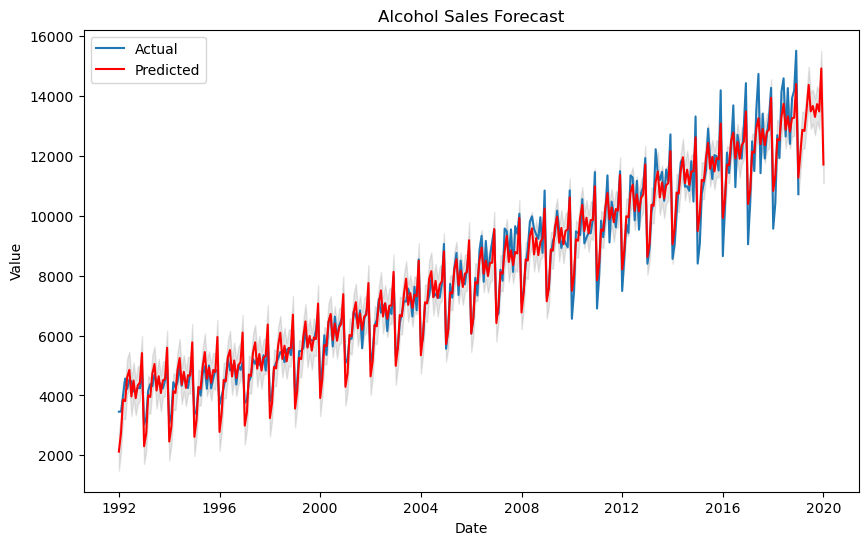

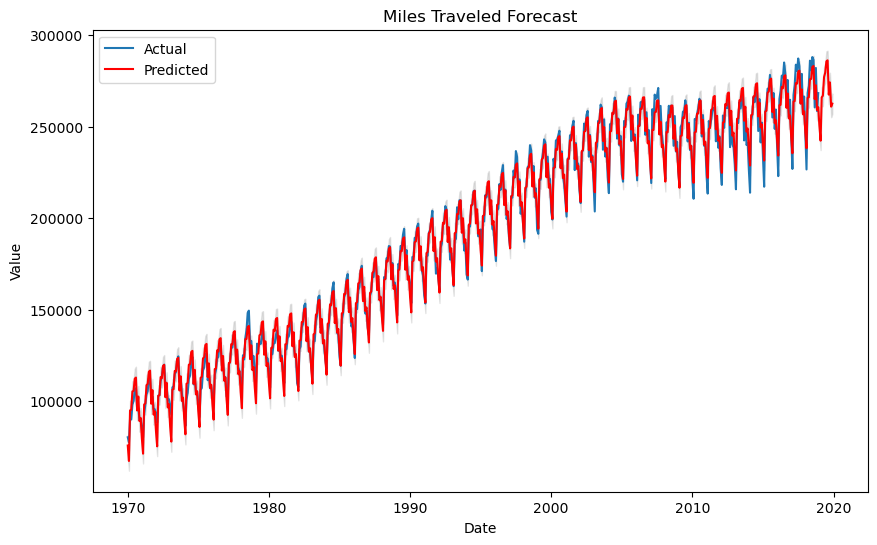

In [19]:
import matplotlib.pyplot as plt

# Function to evaluate and plot the forecast
def evaluate_and_plot(data, forecast, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['ds'], data['y'], label='Actual')
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='red')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Evaluate and plot for Alcohol Sales
evaluate_and_plot(alcohol_sales_df, alcohol_forecast, 'Alcohol Sales Forecast')

# Evaluate and plot for Miles Traveled
evaluate_and_plot(miles_traveled_df, miles_forecast, 'Miles Traveled Forecast')
